# C1 - Métodos de Raizes de Função

Essa classe de problemas pode ser encontrada em diversos problemas reais, como engenharia, economia, física, química, e até mesmo em ciências da computação. A busca por raízes de funções é essencial quando precisamos encontrar valores que satisfaçam uma determinada equação ou modelo matemático, onde o resultado dessa equação é igual a zero. Isso significa que estamos interessados em encontrar os valores de $x$ para os quais $f(x)=0$.

## Aplicações Práticas

Em engenharia, por exemplo, os métodos de raízes de função são frequentemente utilizados no cálculo de tensões em materiais, no projeto de estruturas para determinar pontos críticos e na análise de sistemas dinâmicos. Na economia, podem ser usados para encontrar o ponto de equilíbrio em modelos de oferta e demanda, ou para calcular taxas internas de retorno em análises financeiras.

Na física, as aplicações são ainda mais vastas, desde a determinação de energias de estado estacionário em mecânica quântica até a resolução de equações de movimento. Na química, o cálculo de concentrações em reações químicas em equilíbrio é um exemplo clássico de aplicação de métodos de raízes de função.

Métodos de Solução

Para resolver esses problemas, diversos métodos numéricos foram desenvolvidos, cada um com suas particularidades, vantagens e desvantagens. Entre os mais conhecidos e utilizados, podemos citar:

1. Método da Bissecção: Este é um dos métodos mais simples e robustos. Consiste em localizar a raiz dentro de um intervalo que é sucessivamente dividido ao meio. A convergência é garantida, mas pode ser lenta.

2. Método Regula Falsi (Falsa Posição): Este método é uma melhoria do método da bissecção que incorpora o conceito de interpolação linear para estimar a raiz. Ao invés de simplesmente dividir o intervalo ao meio, como na bissecção, o método Regula Falsi usa uma linha reta para conectar os pontos nas extremidades do intervalo $[a,b]$ onde os valores da função têm sinais opostos, ou seja, $f(a)f(b)<0$. A raiz é estimada no ponto onde essa linha intercepta o eixo xx, o que geralmente fornece uma aproximação mais próxima da raiz real do que a bissecção.O método começa escolhendo dois pontos iniciais onde o sinal da função muda. A cada iteração, o método recalcula a raiz estimada usando a fórmula abaixo onde $c$ é a nova estimativa da raiz. A função é então avaliada em $c$, e dependendo do sinal de $f(c)$, o intervalo é atualizado substituindo $a$ ou $b$ por $c$, mantendo o intervalo entre pontos com sinais opostos de $f(x)$.
$$c=\frac{a f(b) − b f(a)}{f(b)-f(a)}$$

3. Método de Newton-Raphson: Um método mais rápido que usa a derivada da função para estimar a raiz. É muito eficiente para funções bem comportadas, mas pode falhar ou convergir para uma raiz errada se a estimativa inicial não estiver próxima da raiz real.

4. Método da Secante: Uma alternativa ao método de Newton-Raphson que não requer o cálculo da derivada, usando duas estimativas iniciais para aproximar a raiz. Geralmente, converge mais rapidamente que o método da bissecção, mas não tão rápido quanto o método de Newton-Raphson.

In [2]:
cd(@__DIR__);
println(pwd());

using Pkg;
Pkg.activate(pwd());
Pkg.add("Plots");

const build_dir = "build"
const source_dir = "src"

/home/vfegger/projects/TEM-00200/C1


  Activating project at `~/projects/TEM-00200/C1`
   Resolving package versions...
  No Changes to `~/projects/TEM-00200/C1/Project.toml`
  No Changes to `~/projects/TEM-00200/C1/Manifest.toml`


"src"

In [8]:
file = "secant.c"
output = "secant"
compile = `gcc $source_dir/$file -Wall -o $build_dir/$output`
execute = `./$build_dir/$output '>>' ./$build_dir/values.dat`
run(compile)
run(execute)

-1,0.000000
0,1.000000
1,1.333333
2,1.600000
3,1.750000
4,1.846154
5,1.904762
6,1.941176
7,1.963636
8,1.977528
9,1.986111
10,1.991416
11,1.994695
12,1.996721
13,1.997974
14,1.998748
15,1.999226
16,1.999522
17,1.999704
18,1.999817
19,1.999887
20,1.999930
Final Result: 1.999930


Process(`./build/secant '>>' ./build/values.dat`, ProcessExited(0))

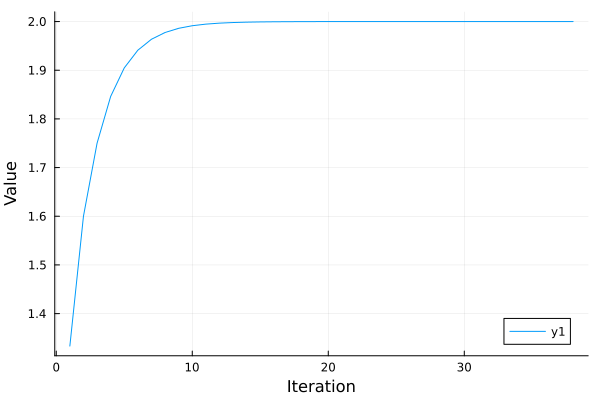

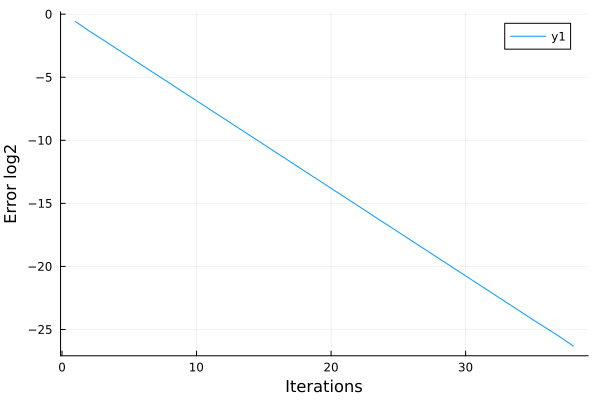

Empirical: 1.6192613848918869; Theoretical: 1.618033988749895; Diff: -0.0012273961419919655


In [4]:
using Plots

lines = readlines("values.dat")
index = parse.(Int, first.(split.(lines, "\t")))
values = parse.(Float64, last.(split.(lines, "\t")))
plt = plot(index, values, xlabel="Iteration", ylabel="Value")
display(plt)
plt = plot(index, log2.(abs.(2.0 .- values)),xlabel="Iterations", ylabel="Error log2")
display(plt)
α = (last(log2.(abs.(2.0 .- values))) - first(log2.(abs.(2.0 .- values)))) / (last(index) - first(index))
convergence = 2.0^-α
expected = (1.0 + sqrt(5.0)) / 2.0
println("Empirical: " * string(convergence) * "; Theoretical: " * string(expected) * "; Diff: " * string(expected - convergence))

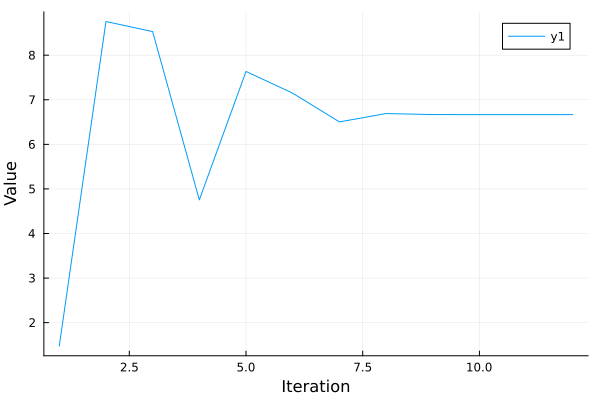

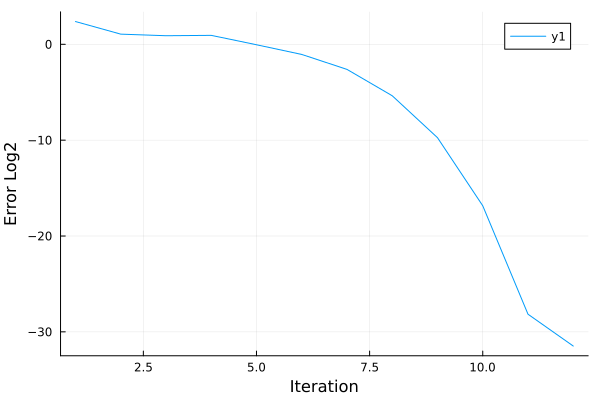

In [6]:
using Plots

lines = readlines("values2.dat")
index = parse.(Int, first.(split.(lines, "\t")))
values = parse.(Float64, last.(split.(lines, "\t")))
plt = plot(index, values, xlabel="Iteration", ylabel="Value")
display(plt)
plt = plot(index, log2.(abs.((20.0 / 3.0) .- values)), xlabel="Iteration", ylabel="Error Log2")
display(plt)